# AIAp Miniproject 2

## Contents

- [Imports](#imports)

## Imports

In [18]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
from keras import utils as keras_utils
import tensorflow as tf

## Configs

In [9]:
SEED = 42

## Dataset

### b) Citation and description

Citation: 
> Llamas, J. (2017). Architectural Heritage Elements Dataset: 64 (creative commons) revised (Version 1) [Dataset; .Jpg in .Zip]. Fundación CARTIF. https://correo.cartif.es/home/joslla@cartif.es/Briefcase/Architectural_Heritage_Elements_image_Dataset/Architectural_Heritage_Elements_Dataset_128%28creative_commons%29.zip

- **Title:** Architectural Heritage Elements Dataset
- **Subtitle:** 128 (creative commons) revised
- **Version:** 1
- **Publication Date:** 2017-02-20
- **Author:** Jose Llamas
- **Organization:** Fundación CARTIF
- **Source:** https://correo.cartif.es/home/joslla@cartif.es/Briefcase/Architectural_Heritage_Elements_image_Dataset/Architectural_Heritage_Elements_Dataset_128%28creative_commons%29.zip
- **Media:** .jpg in .zip
- **Download:** 2024-03-26

The raw data was extracted with Windows. We then added it to our repository on the Gitlab instance of OST.

This dataset consists of 10437 RGB 64x64 jpg images classified in 11 categories:
- Altar: 828 images
- Apse: 505 images
- Bell tower: 1057 images
- Column: 1914 images
- Dome (inner): 589 images
- Dome (outer): 1175 images
- Flying buttress: 405 images
- Gargoyle (and Chimera): 1562 images
- Portal: 307 images
- Stained glass: 998 images
- Vault: 1097 images

As "flying buttress" and "portal" do not satisfy the minimal samples requirement of 500, we dropped them. Our adjusted dataset therefore fulfils the requirements:
- RGB images of 9 classes
- Each has more than 500 samples and the total is 9725 images
- They have a resolution of 64x64 pixels

In [28]:
data_folder = Path(os.getcwd()).parent / "data"
raw_folder = data_folder / "raw" / "Architectural_Heritage_Elements_Dataset_64(creative_commons)_revised"

training_dataset = keras_utils.image_dataset_from_directory(
  raw_folder, 
  image_size=(64, 64), 
  seed=SEED, 
  validation_split=0.3, 
  subset="training"
)

test_dataset = keras_utils.image_dataset_from_directory(
  raw_folder, 
  image_size=(64, 64), 
  seed=SEED, 
  validation_split=0.3,
  subset="validation"
)

label_to_class = training_dataset.class_names
class_to_label = dict(zip(label_to_class, range(len(label_to_class))))

Found 9725 files belonging to 9 classes.
Using 6808 files for training.
Found 9725 files belonging to 9 classes.
Using 2917 files for validation.
<BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'gargoyle', 'stained_glass', 'vault']
['altar', 'apse', 'bell_tower', 'column', 'dome(inner)', 'dome(outer)', 'gargoyle', 'stained_glass', 'vault']
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


### c) Splitting into training and test data

In [31]:

train_data, validation_data = keras_utils.split_dataset(training_dataset, left_size=0.8, shuffle=True)


## Exploratory data analysis

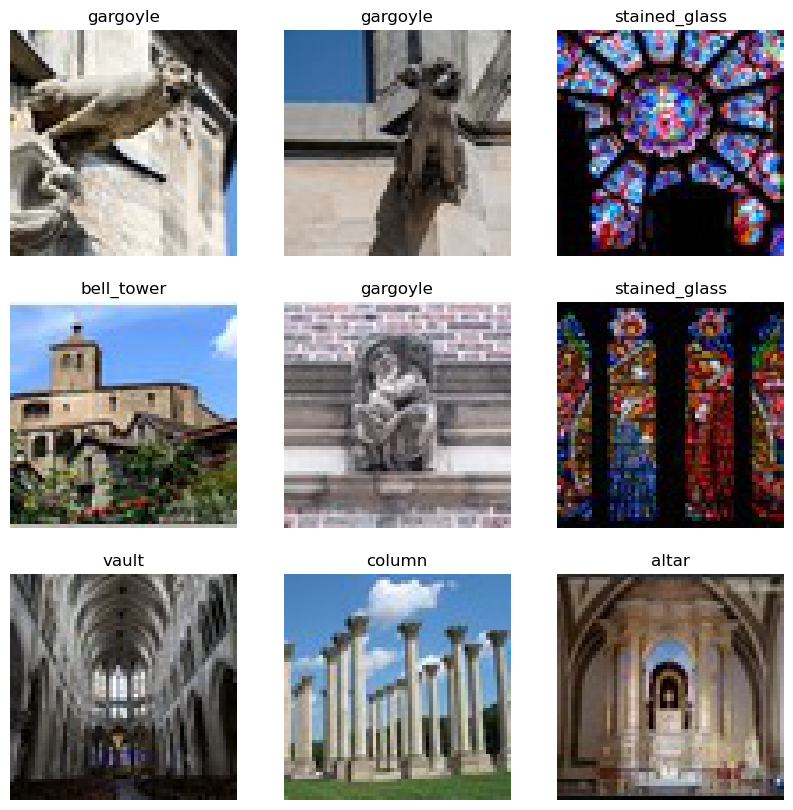

In [23]:
plt.figure(figsize=(10, 10))
for images, labels in train_val_data.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(label_to_class[labels[i]])
    plt.axis("off")

## Architecture 1 (underfitting)

## Architecture 2 (overfitting)

## Architecture 2 (optimized)

## Quantification of the model performance

## Discussion